# Investigating resampling methods on classification algorithms on Credit card Fraud Detection dataset

In [1]:
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib import pyplot  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

from numpy import where
from collections import Counter
from termcolor import colored

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from scipy.io import arff

import warnings
warnings.filterwarnings("ignore")

print(colored("\nAbove Libraries were imported successfully...", color = "green", attrs = ["bold", "dark"]))

!pip install imblearn
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
print(colored("\nAbove Libraries were imported successfully...", color = "green", attrs = ["bold", "dark"]))

pd.set_option('display.max_columns', 30)

import os
os.chdir(r"C:\Users\sagi2\OneDrive - Northumbria University - Production Azure AD\Dissertation\Code\dataset")

data = arff.loadarff('creditcardfraud.arff')
df = pd.DataFrame(data[0])
print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")
df.head()


Above Libraries were imported successfully...

Above Libraries were imported successfully...
There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Check for null values

In [2]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


## Describe the dataset

In [3]:
df.describe().style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

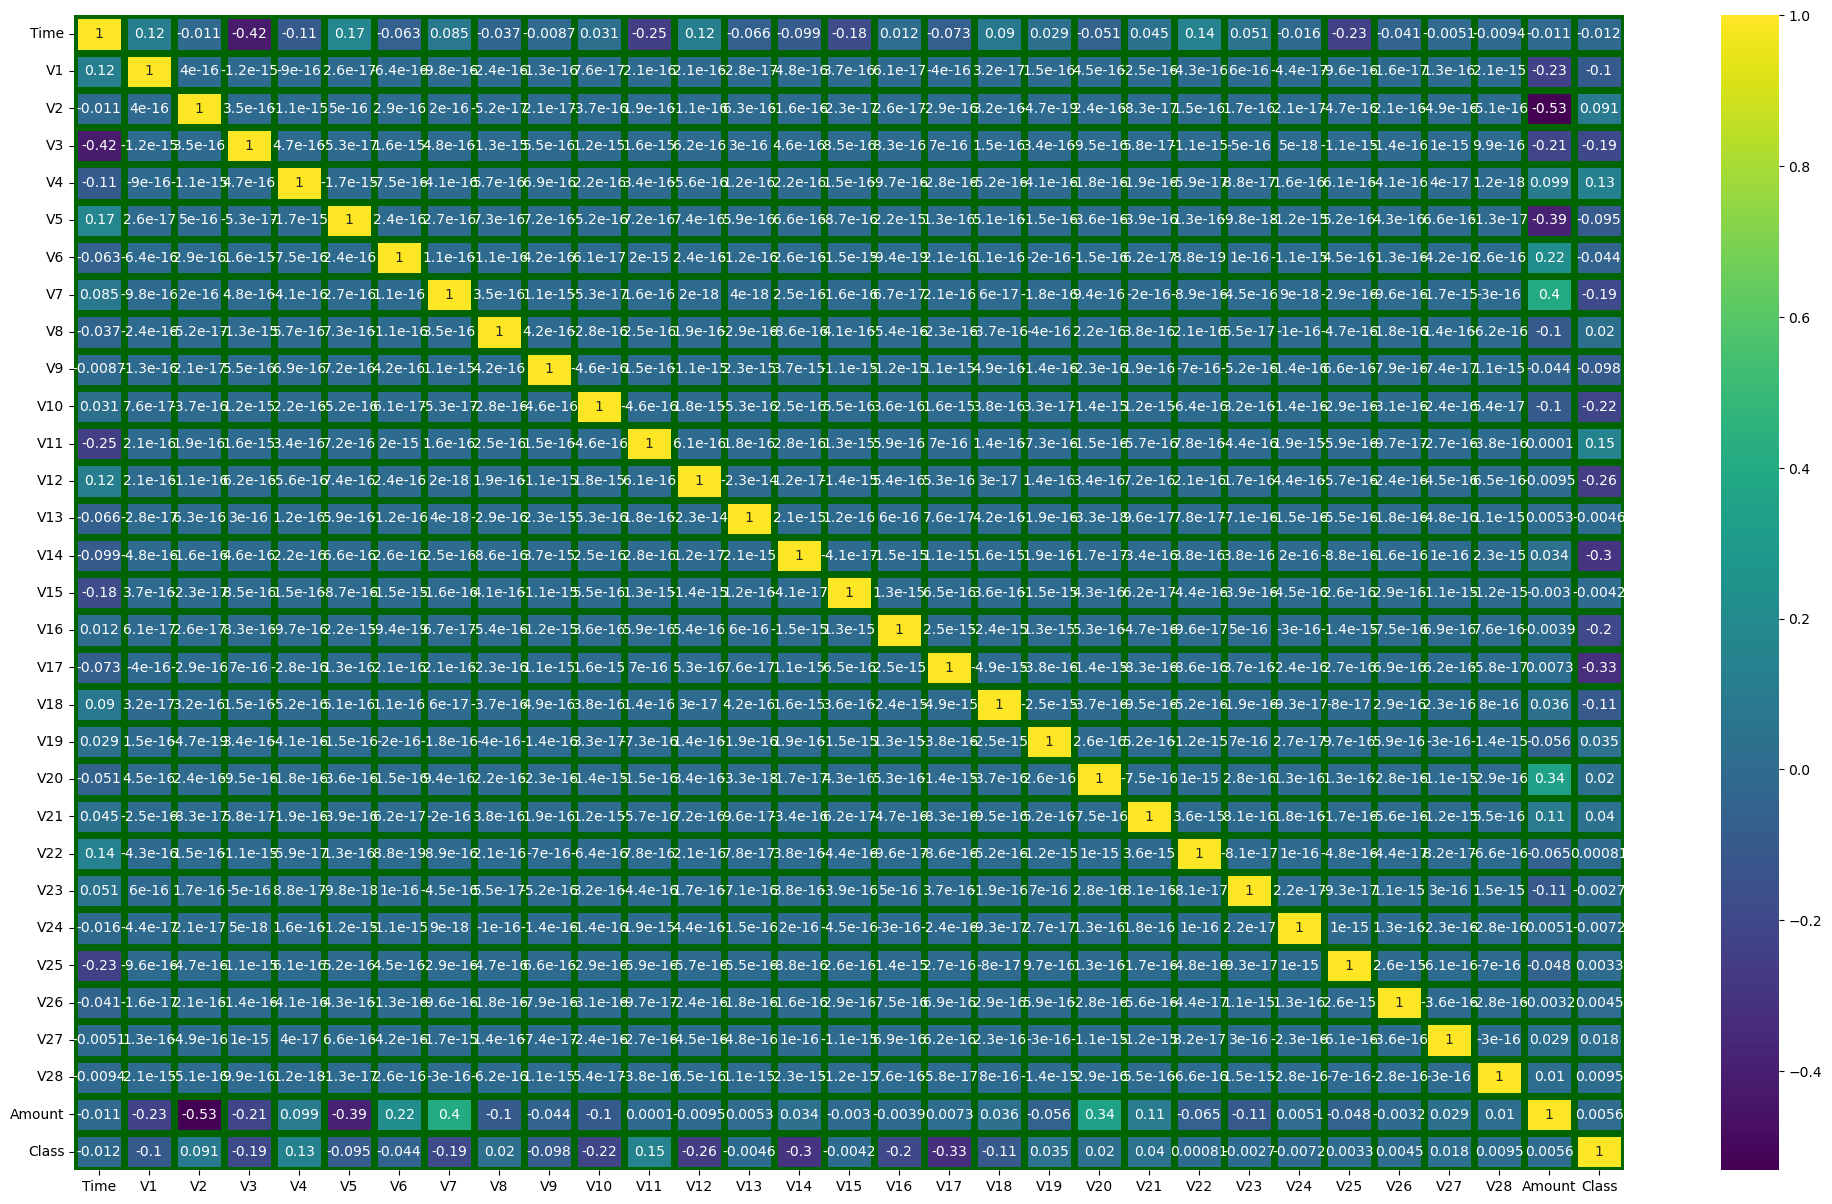

In [5]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "#006400", cmap = "viridis");

## Pie chart

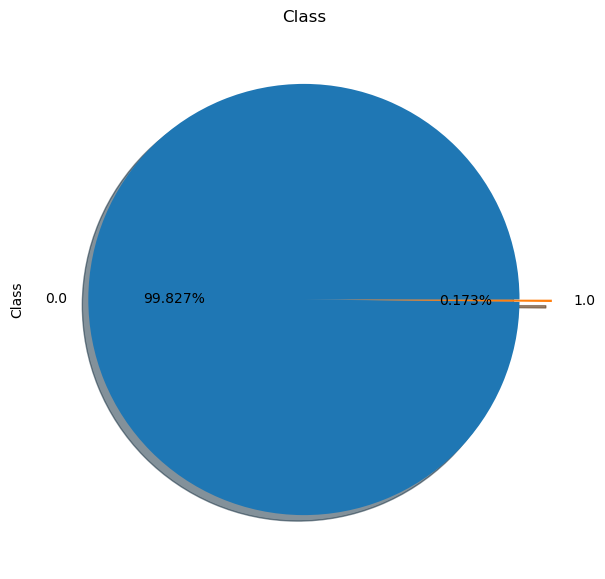

In [6]:
plt.figure(figsize = [20, 7], clear = True, facecolor = "#FFFFFF")
plt.title("Class")
df["Class"].value_counts().plot.pie(explode = [0, 0.15], autopct = '%1.3f%%', shadow = True);

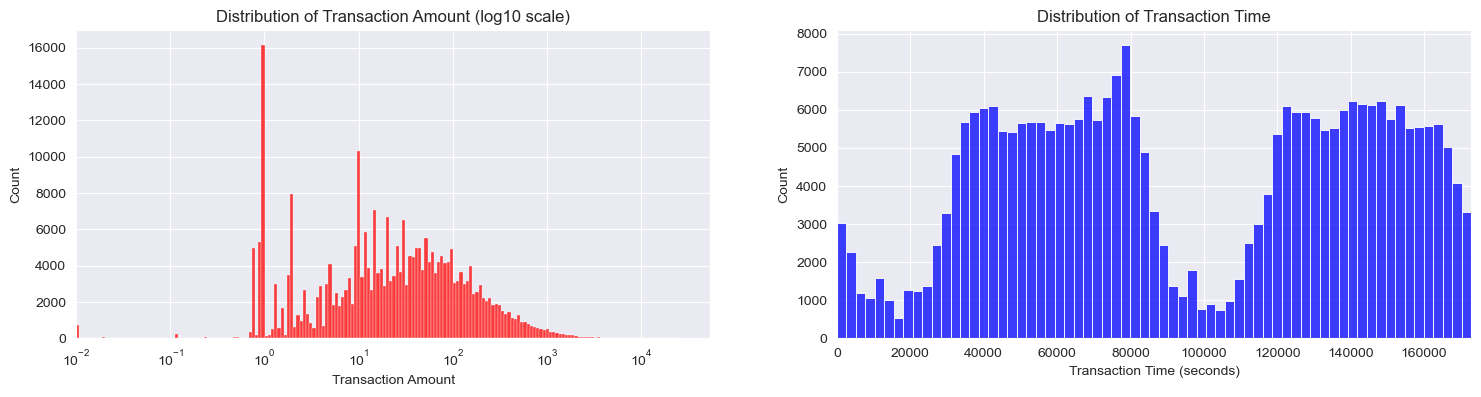

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig, axs = plt.subplots(ncols=2, figsize=(18,4))

# Plot the histogram of positive transaction amounts
amount_pos = df[df['Amount'] > 0]['Amount']
sns.histplot(data=amount_pos, ax=axs[0], log_scale=True, color='r')
axs[0].set(title='Distribution of Transaction Amount (log10 scale)', xlabel='Transaction Amount')

# Plot the histogram of negative transaction amounts
amount_neg = df[df['Amount'] < 0]['Amount']
sns.histplot(data=amount_neg, ax=axs[0], log_scale=True, color='b')

# Plot the histogram of transaction times
sns.histplot(data=df, x='Time', ax=axs[1], color='b')
axs[1].set(title='Distribution of Transaction Time', xlabel='Transaction Time (seconds)')

axs[0].set_xlim(left=min(amount_pos))
axs[1].set_xlim(left=0, right=max(df['Time']))

plt.show()


In [8]:
from sklearn.preprocessing import RobustScaler

# Scale the 'Amount' and 'Time' columns
rob_scaler = RobustScaler()
df[['scaled_amount', 'scaled_time']] = rob_scaler.fit_transform(df[['Amount', 'Time']])

# Drop the original 'Amount' and 'Time' columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Move the scaled columns to the front
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

# Verify that the 'Amount' and 'Time' columns should have moved to the front
df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,...,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,...,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,...,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,...,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,...,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [9]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 1081 duplicate rows in the data set.
The duplicate rows were removed.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  283726 non-null  float64
 1   scaled_time    283726 non-null  float64
 2   V1             283726 non-null  float64
 3   V2             283726 non-null  float64
 4   V3             283726 non-null  float64
 5   V4             283726 non-null  float64
 6   V5             283726 non-null  float64
 7   V6             283726 non-null  float64
 8   V7             283726 non-null  float64
 9   V8             283726 non-null  float64
 10  V9             283726 non-null  float64
 11  V10            283726 non-null  float64
 12  V11            283726 non-null  float64
 13  V12            283726 non-null  float64
 14  V13            283726 non-null  float64
 15  V14            283726 non-null  float64
 16  V15            283726 non-null  float64
 17  V16            283726 non-nul

In [11]:
df.shape

(283726, 31)

In [12]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


In [13]:
df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.928844,0.118882,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,...,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667
std,3.498909,0.557820,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,...,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796
min,-0.307413,-0.994983,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,...,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.229162,-0.358172,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,...,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000
50%,0.000000,0.000006,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,...,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000
75%,0.775658,0.641525,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,...,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000
max,358.683155,1.035022,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,...,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


#### Histograms to visualize the distribution of each of the V1 to V28 features for both fraudulent as well as non-fraudulent transactions

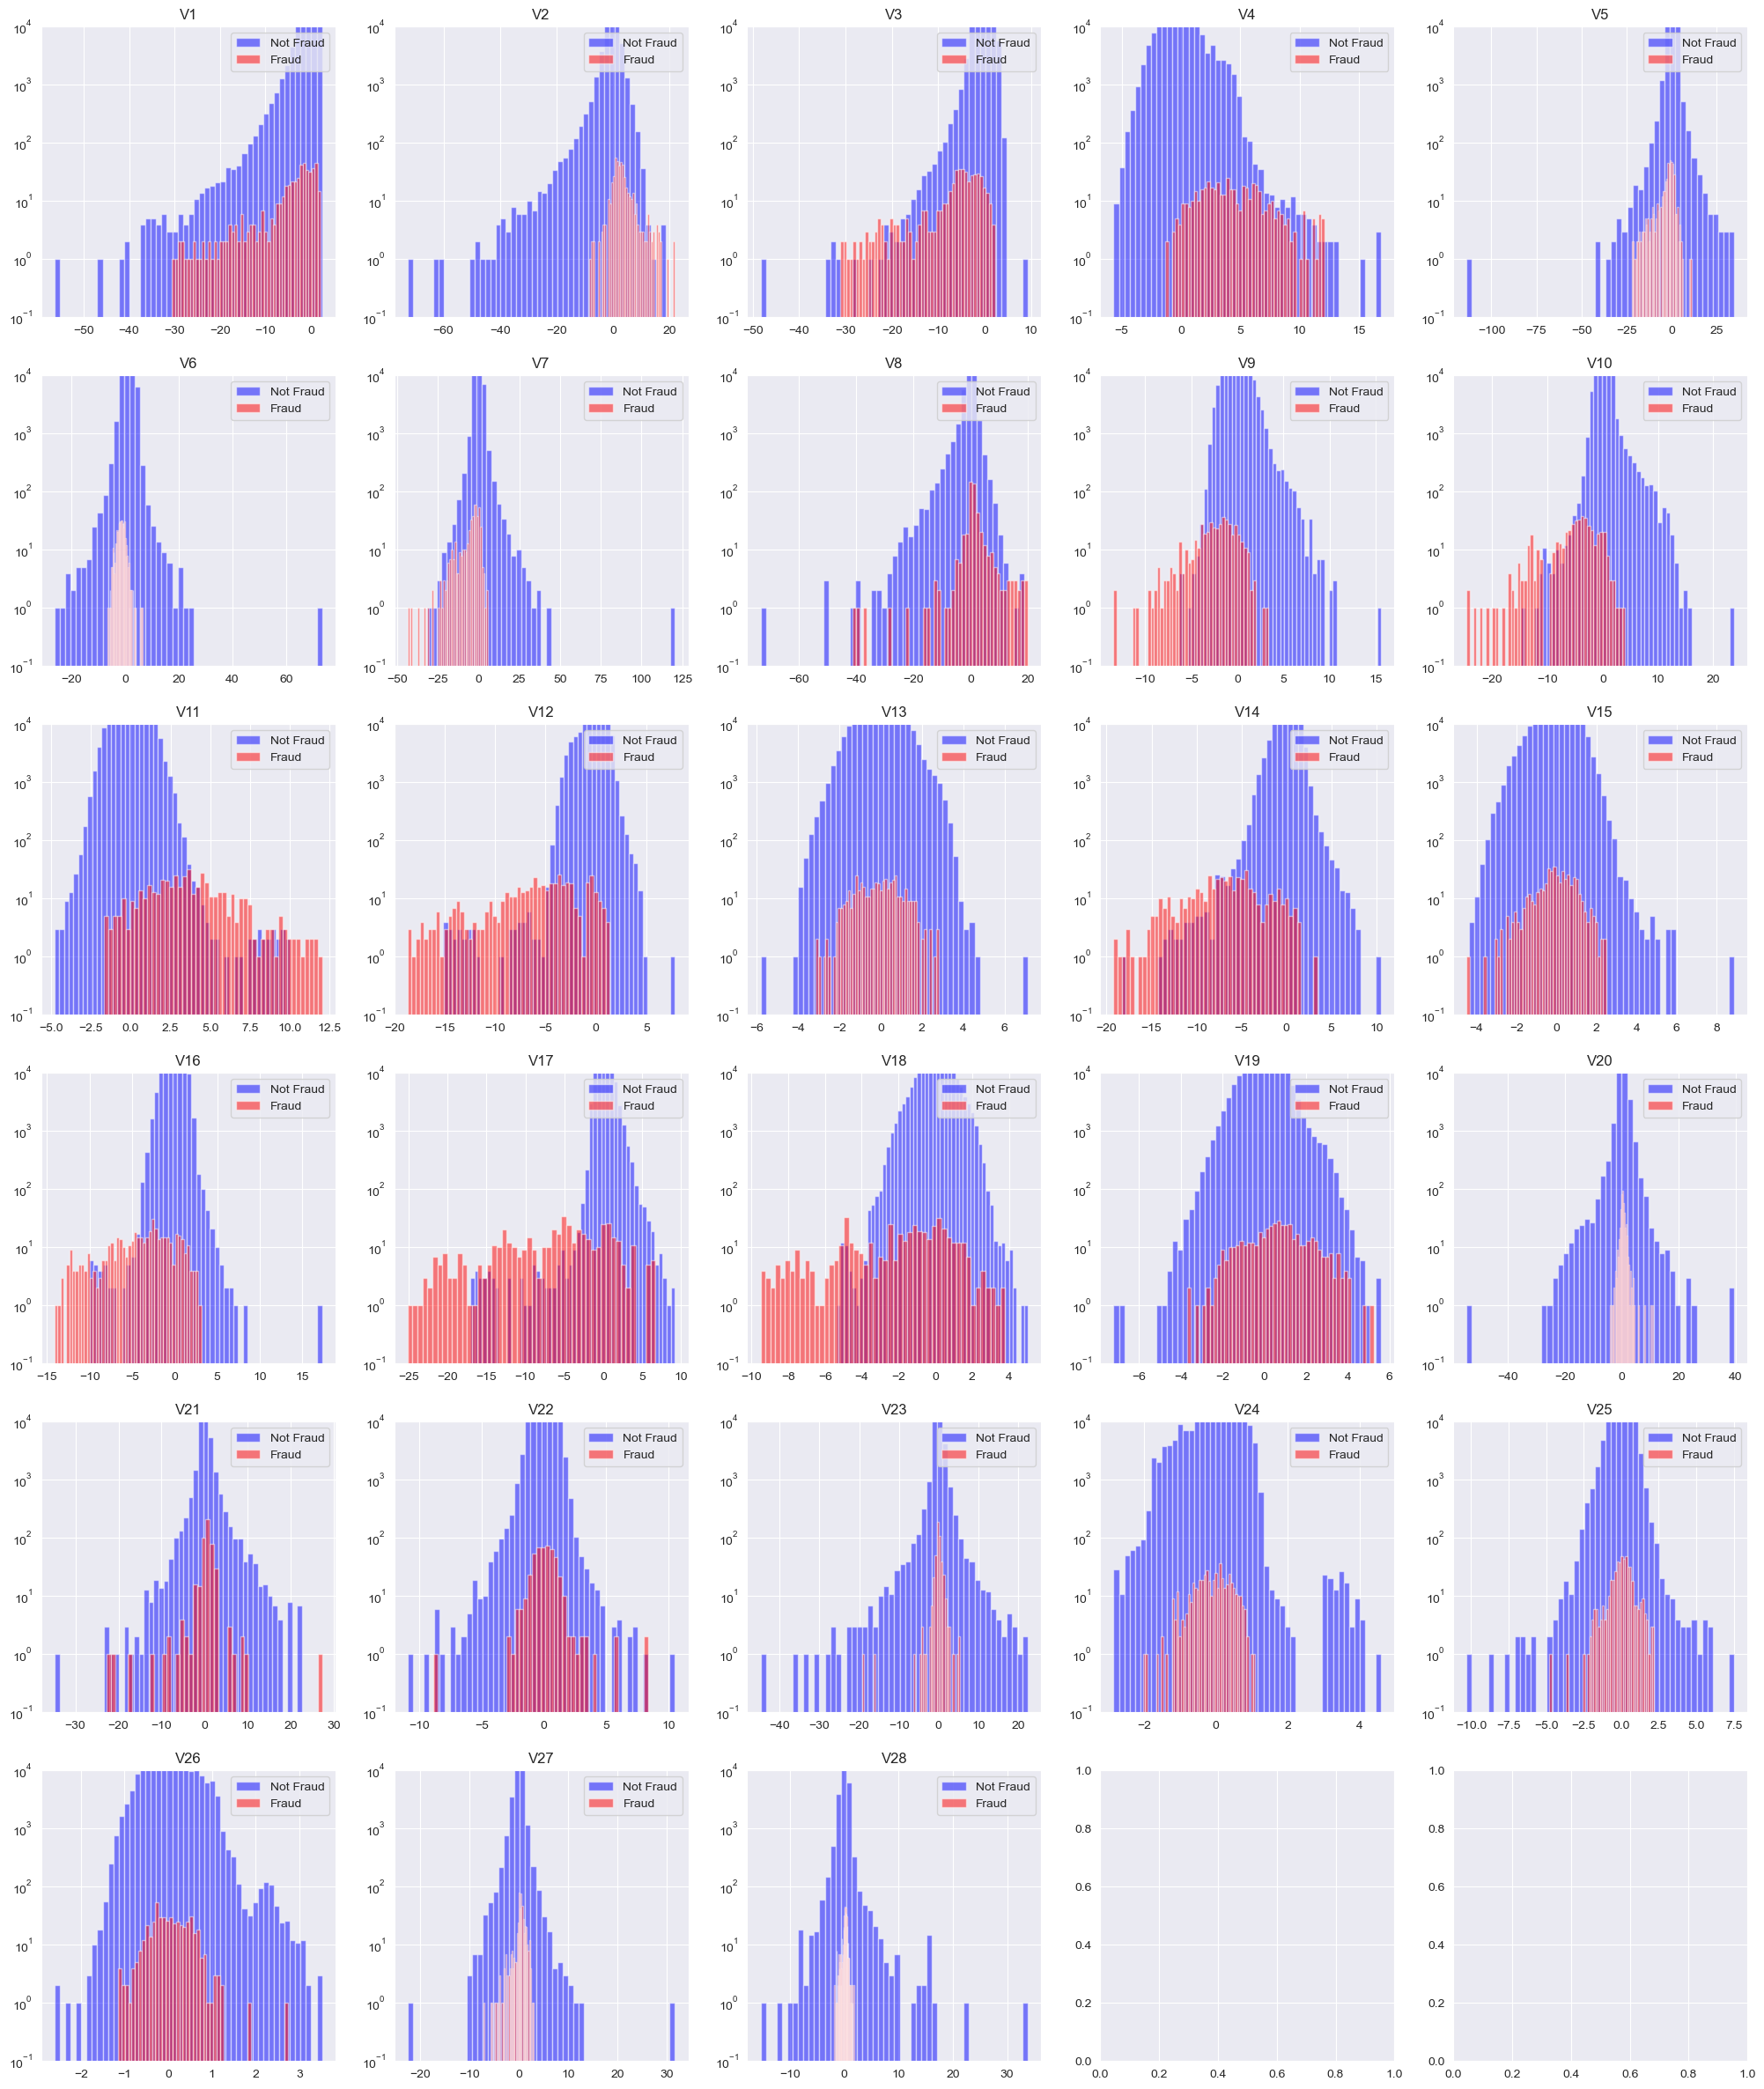

In [14]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(25, 30))
for i in range(6):
    for j in range(5):
        col = i*5+j+1
        if col <= 28:
            axs[i,j].hist(df[df['Class']==0]['V'+str(col)], bins=50, color='b', alpha=0.5, label='Not Fraud')
            axs[i,j].hist(df[df['Class']==1]['V'+str(col)], bins=50, color='r', alpha=0.5, label='Fraud')
            axs[i,j].set_title('V'+str(col))
            axs[i,j].set_yscale('log')
            axs[i,j].set_ylim([0.1, 10000])
            axs[i,j].legend(loc='upper right')
plt.show()


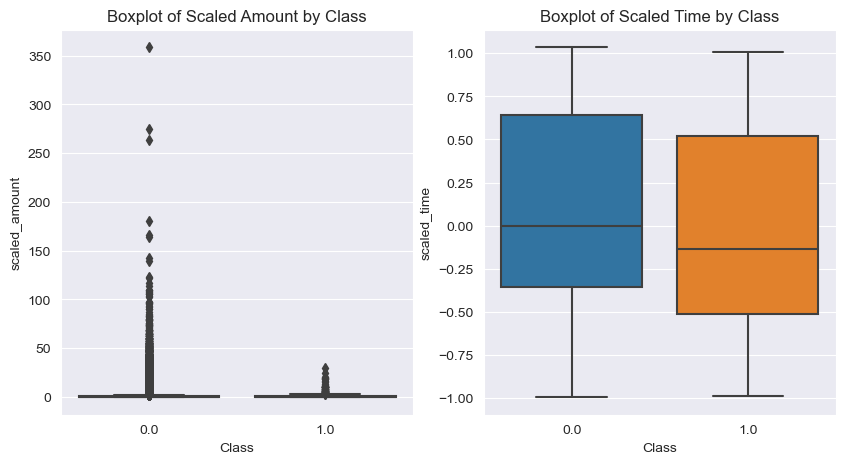

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Boxplot of scaled amount and class
sns.boxplot(x='Class', y='scaled_amount', data=df, ax=axs[0])
axs[0].set_title('Boxplot of Scaled Amount by Class')

# Boxplot of scaled time and class
sns.boxplot(x='Class', y='scaled_time', data=df, ax=axs[1])
axs[1].set_title('Boxplot of Scaled Time by Class')

plt.show()


## Split the data 

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into dependent and independent variables
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into train and test sets using StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Normalizing the data using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns = X_test.columns)


### Define sampling methods and scoring

In [17]:
def plot_confusion_matrix(ax, y_test, y_pred, title):
    rec = round(recall_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, linewidths=2, cbar=True, linecolor="white", fmt=".0f", ax=ax)
    ax.set_xlabel("predictions")
    ax.set_ylabel("original_y")
    ax.set_title("{0}\nRecall Score: {1}".format(title, rec), size=12)

def scoring(model, x_train, y_train, x_test, y_test, title):
    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    all_scores = {"Accuracy score": accuracy_score(y_test, y_pred),
                  "Precision score": (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score": recall_score(y_test, y_pred),
                  "F1 score": f1_score(y_test, y_pred),
                  "ROC AUC score": roc_auc_score(y_test, y_prob)}
    print(title)
    print(all_scores)
    return all_scores


def samplingStrategies():
    
    samplers = [("Random oversampling", RandomOverSampler), ("SMOTE", SMOTE), ("Borderline SMOTE", BorderlineSMOTE), ("Borderline SMOTE SVM", SVMSMOTE), ("ADASYN", ADASYN)]
    
    # Create subplots for each sampling strategy as well as non-resampled
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axes = axes.flatten()
    
    # Plot the non-resampled confusion matrix in the last subplot
    cm_non_resampled = scoring(classification_model, X_train, y_train, X_test, y_test, "Non-resampled")
    plot_confusion_matrix(axes[-1], y_test, classification_model.predict(X_test), "Non-resampled")
    
    # get performance metrics and confusion matrix for each sampling strategy
    cm_resampled_list = []  # create empty list to store each sampler_name and cm_resampled value
    for i, (sampler_name, sampler) in enumerate(samplers):
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        cm_resampled = scoring(classification_model, X_resampled, y_resampled, X_test, y_test, sampler_name)
        plot_confusion_matrix(axes[i], y_test, classification_model.predict(X_test), sampler_name)
        cm_resampled_list.append((sampler_name, cm_resampled))  # append a tuple of sampler_name and cm_resampled to the list
    
    cm_resampled_list.append(("Non-resampled", cm_non_resampled))
    plt.tight_layout()
    plt.show()
    return cm_resampled_list


### Defining functions for ROC and PR curves

In [18]:
samplers = [("Random oversampling", RandomOverSampler), ("SMOTE", SMOTE), ("Borderline SMOTE", BorderlineSMOTE), ("Borderline SMOTE SVM", SVMSMOTE), ("ADASYN", ADASYN)]


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for ROC curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    
    # Plot ROC curve for non-resampled data
    y_prob = classification_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    axes.plot(fpr, tpr, label="Non-resampled (AUC = {:.4f})".format(roc_auc), lw=2)
    
    # Plot ROC curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_prob = classification_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        axes.plot(fpr, tpr, label="{} (AUC = {:.4f})".format(sampler_name, roc_auc), lw=2)
    
    axes.set_xlabel("False Positive Rate", fontsize=12)
    axes.set_ylabel("True Positive Rate", fontsize=12)
    axes.set_title("ROC Curves", fontsize=14)
    axes.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()



In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

def plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for PR curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    
    # Plot PR curve for non-resampled data
    y_prob = classification_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    axes.plot(recall, precision, label="Non-resampled (AUC = {:.4f})".format(pr_auc), lw=2)
    
    # Plot PR curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_prob = classification_model.predict_proba(X_test)[:, 1]
        p, r, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)
        axes.plot(r, p, label="{} (AUC = {:.4f})".format(sampler_name, pr_auc), lw=2)
    
    axes.set_xlabel("Recall", fontsize=12)
    axes.set_ylabel("Precision", fontsize=12)
    axes.set_title("PR Curves", fontsize=14)
    axes.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()


### Logistic regression

Non-resampled
{'Accuracy score': 0.9991012424002115, 'Precision score': 0.9998587819947043, 'Recall score': 0.5473684210526316, 'F1 score': 0.6709677419354839, 'ROC AUC score': 0.970039856923863}
Random oversampling
{'Accuracy score': 0.9758745263899903, 'Precision score': 0.9759752868490733, 'Recall score': 0.9157894736842105, 'F1 score': 0.11276733635774465, 'ROC AUC score': 0.9779874576113717}
SMOTE
{'Accuracy score': 0.975557317825359, 'Precision score': 0.975657546337158, 'Recall score': 0.9157894736842105, 'F1 score': 0.11146700832799486, 'ROC AUC score': 0.9796025456403586}
Borderline SMOTE
{'Accuracy score': 0.9924574852409904, 'Precision score': 0.9926566637246249, 'Recall score': 0.8736842105263158, 'F1 score': 0.2794612794612794, 'ROC AUC score': 0.9569901054489709}
Borderline SMOTE SVM
{'Accuracy score': 0.9929685434840074, 'Precision score': 0.9931685789938217, 'Recall score': 0.8736842105263158, 'F1 score': 0.29380530973451324, 'ROC AUC score': 0.9602407209550796}
ADASYN


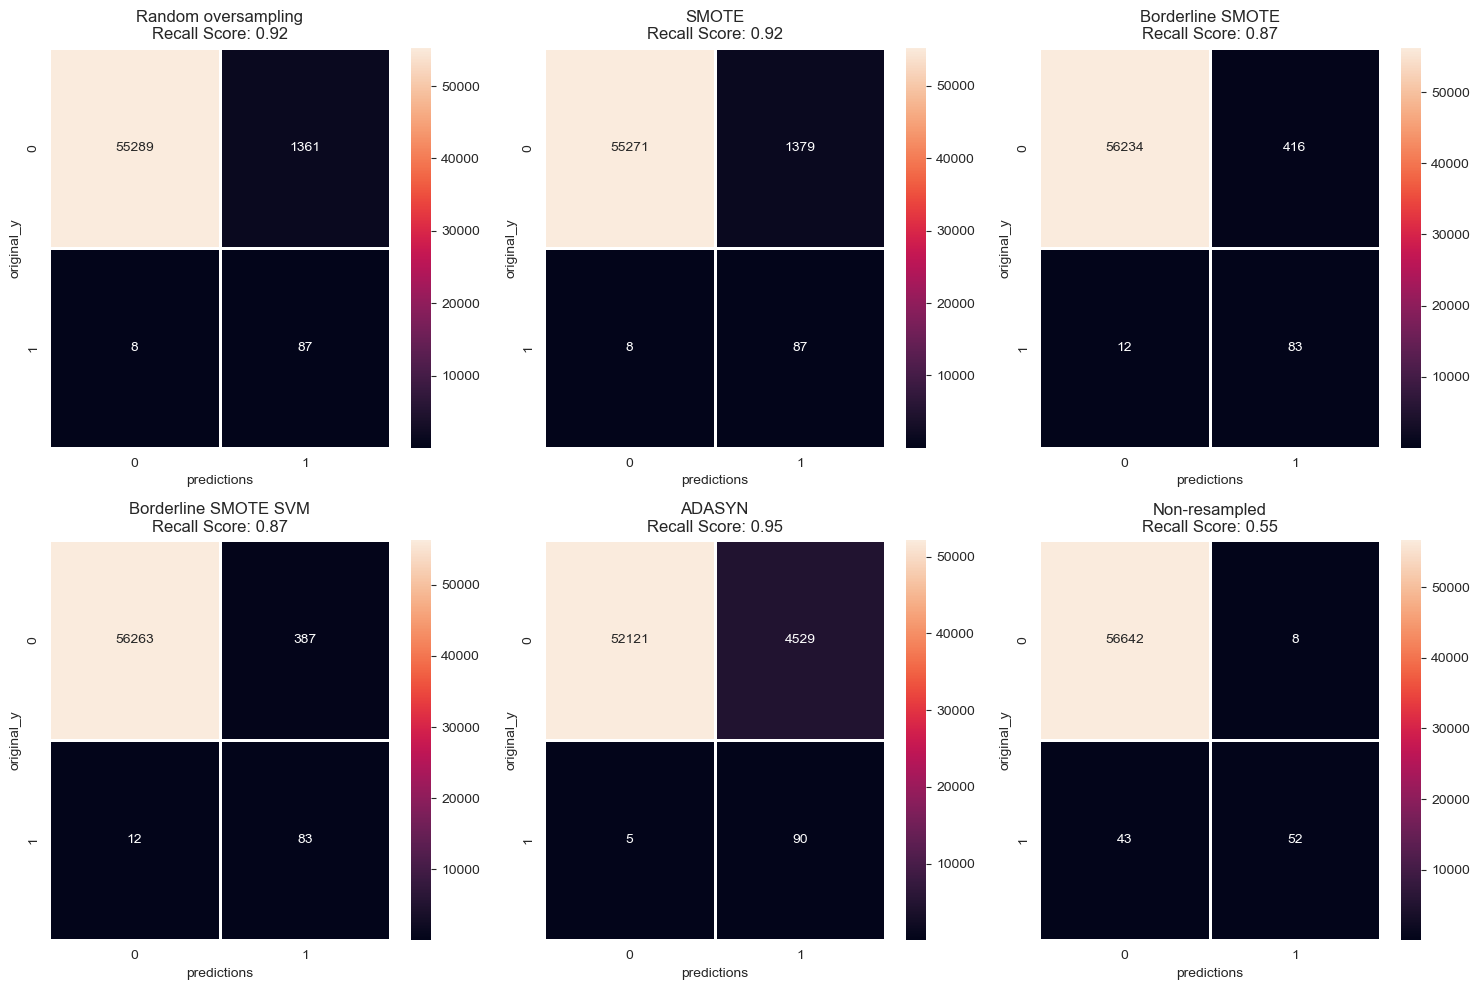

Elapsed time for Logistic regression with all oversampling methods: 24.06 seconds


In [21]:
from sklearn.linear_model import LogisticRegression
import time

# Create logistic regression model
classification_model = LogisticRegression()

# start calculting the time
start_time = time.time()

# Fit model with best hyperparameters to training data
classification_model.fit(X_train, y_train)
logistic_scores = samplingStrategies()
end_time = time.time()
log_reg_elapsed_time = end_time - start_time
print("Elapsed time for Logistic regression with all oversampling methods: {:.2f} seconds".format(end_time - start_time))

### plot ROC and PR curves

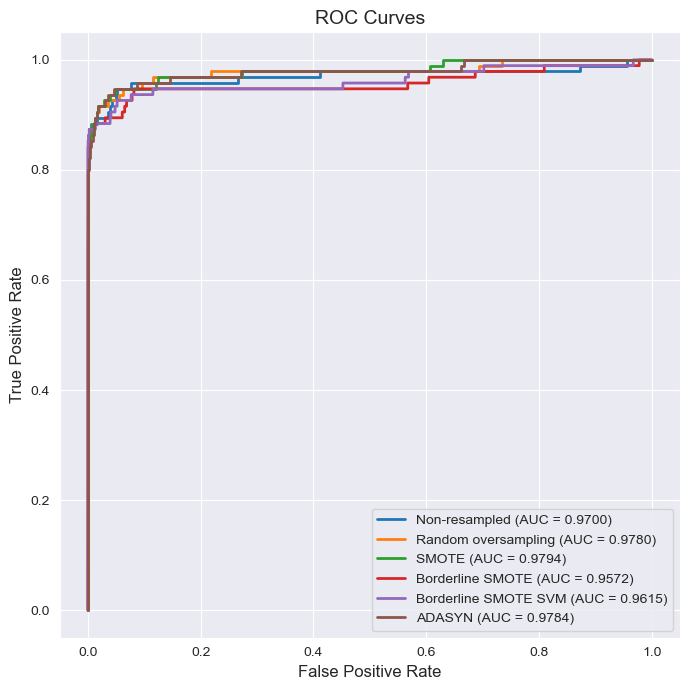

In [22]:
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)


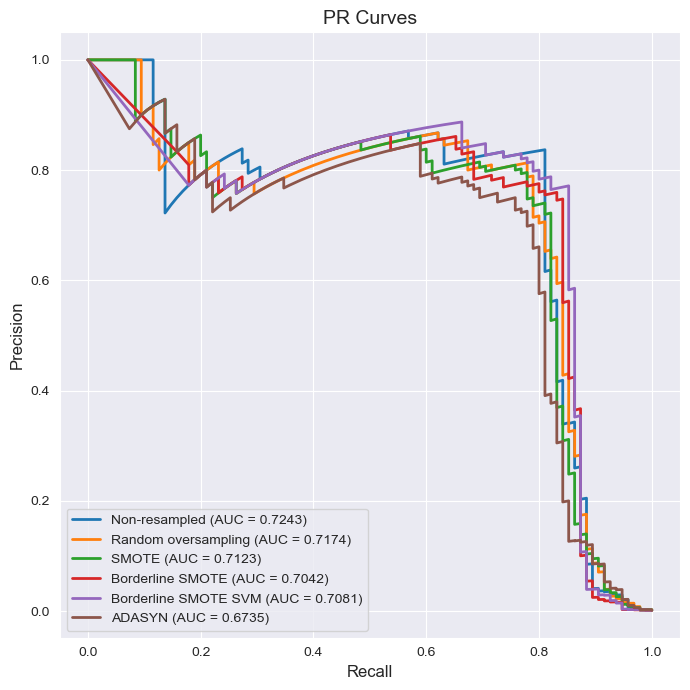

In [23]:
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)


### KNN

Non-resampled
{'Accuracy score': 0.9995241871530531, 'Precision score': 0.9999293909973521, 'Recall score': 0.7578947368421053, 'F1 score': 0.8421052631578948, 'ROC AUC score': 0.9051862312444836}
Random oversampling
{'Accuracy score': 0.9993127147766323, 'Precision score': 0.9996646072374228, 'Recall score': 0.7894736842105263, 'F1 score': 0.7936507936507936, 'ROC AUC score': 0.9051499976773354}
SMOTE
{'Accuracy score': 0.9987487884395101, 'Precision score': 0.9990114739629302, 'Recall score': 0.8421052631578947, 'F1 score': 0.6926406926406926, 'ROC AUC score': 0.9207052538672365}
Borderline SMOTE
{'Accuracy score': 0.9994008282668077, 'Precision score': 0.9997175639894087, 'Recall score': 0.8105263157894737, 'F1 score': 0.8191489361702128, 'ROC AUC score': 0.9209152227435314}
Borderline SMOTE SVM
{'Accuracy score': 0.9994184509648427, 'Precision score': 0.9996999117387467, 'Recall score': 0.8315789473684211, 'F1 score': 0.8272251308900523, 'ROC AUC score': 0.9209126213592232}
ADASYN


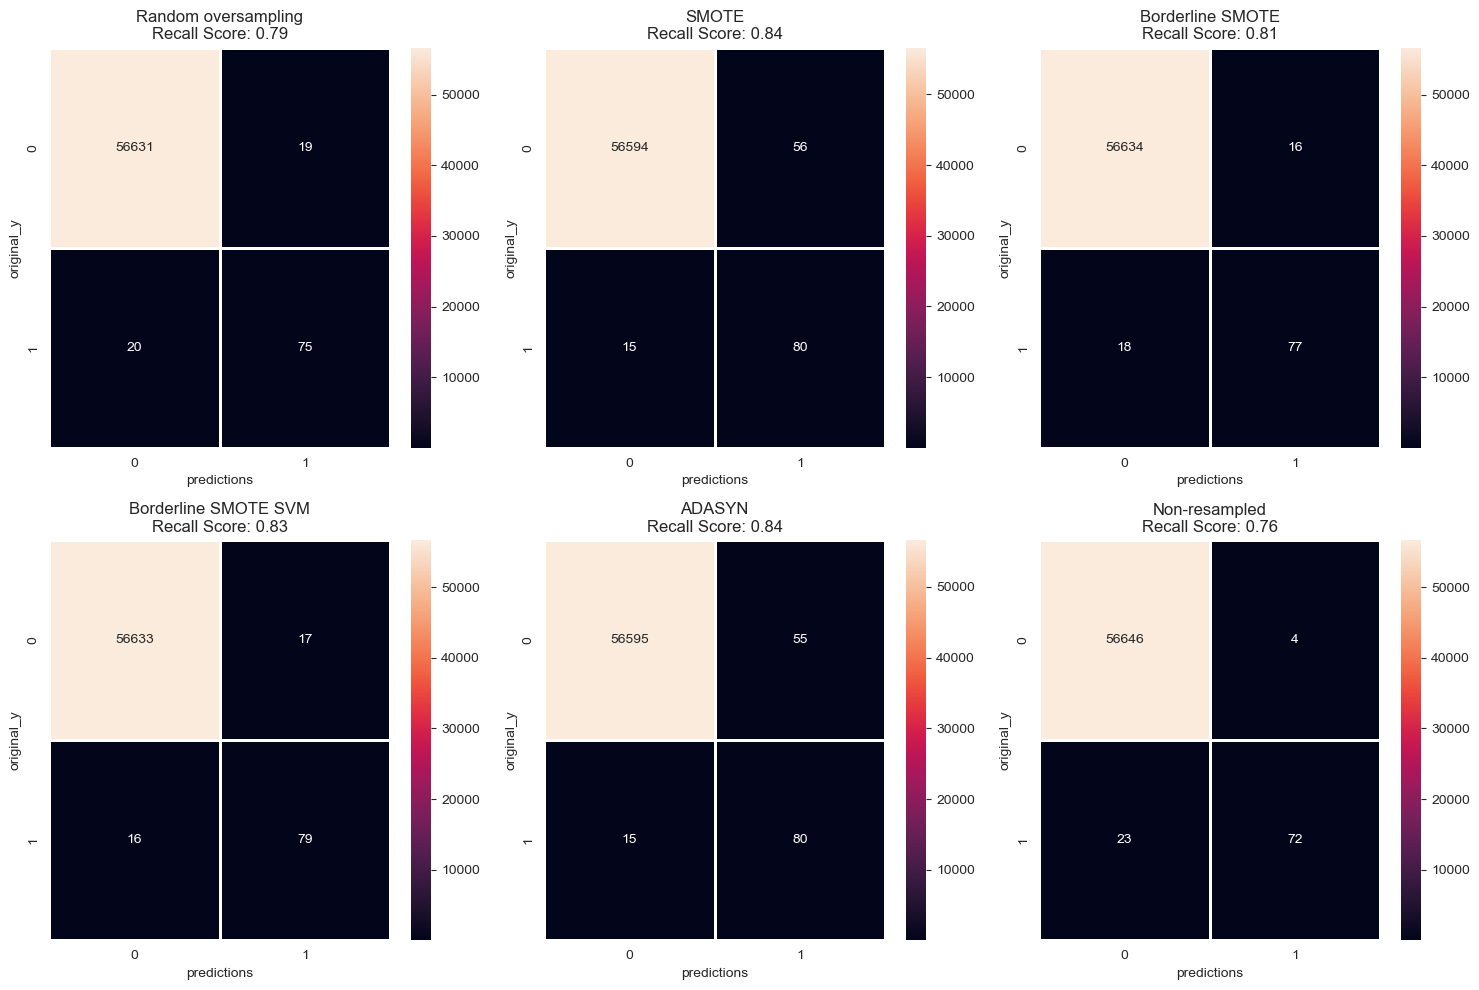

Elapsed time for KNN with all oversampling methods: 232.79 seconds


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
classification_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', n_jobs = -1, leaf_size = 1000)

# start calculting the time
start_time = time.time()

# Fit model with best hyperparameters to training data
classification_model.fit(X_train, y_train)
knn_scores = samplingStrategies()
end_time = time.time()
knn_elapsed_time = end_time - start_time
print("Elapsed time for KNN with all oversampling methods: {:.2f} seconds".format(end_time - start_time))

### Plot ROC and PR curves

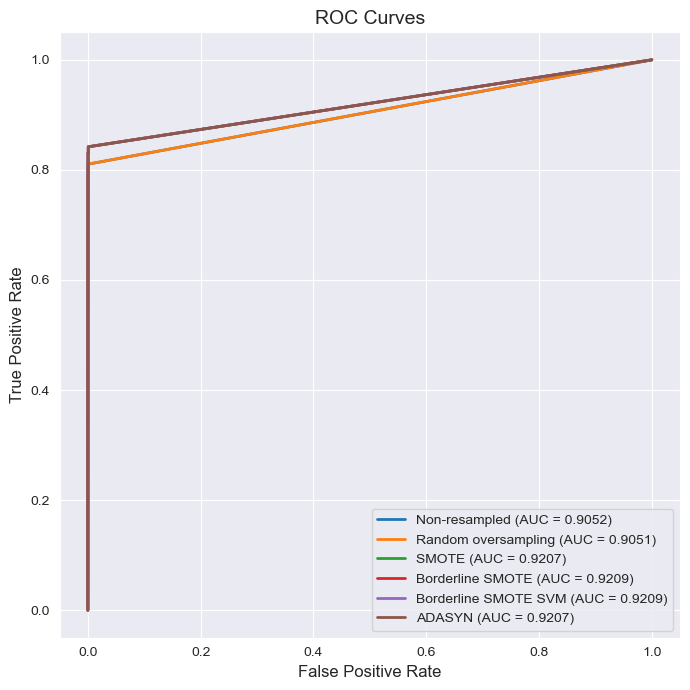

In [25]:
classification_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', n_jobs = -1)
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

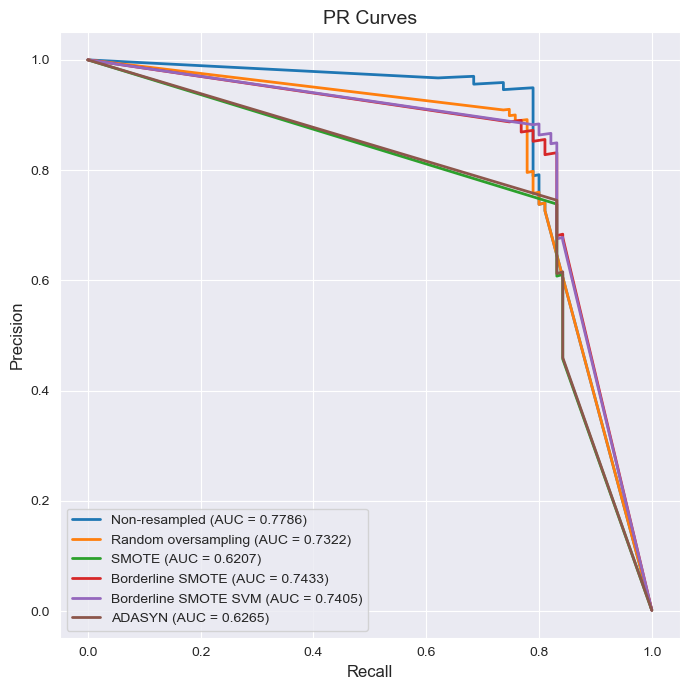

In [26]:
classification_model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', n_jobs = -1)
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

### Random Forest

Non-resampled
{'Accuracy score': 0.9995594325491233, 'Precision score': 0.9999646954986761, 'Recall score': 0.7578947368421053, 'F1 score': 0.8520710059171599, 'ROC AUC score': 0.951055325869838}
Random oversampling
{'Accuracy score': 0.9995594325491233, 'Precision score': 0.9999470432480141, 'Recall score': 0.7684210526315789, 'F1 score': 0.8538011695906433, 'ROC AUC score': 0.9617501741998421}
SMOTE
{'Accuracy score': 0.9995241871530531, 'Precision score': 0.9998058252427184, 'Recall score': 0.8315789473684211, 'F1 score': 0.8540540540540541, 'ROC AUC score': 0.9845348631950572}
Borderline SMOTE
{'Accuracy score': 0.9995594325491233, 'Precision score': 0.9999293909973521, 'Recall score': 0.7789473684210526, 'F1 score': 0.8554913294797688, 'ROC AUC score': 0.9560638268221304}
Borderline SMOTE SVM
{'Accuracy score': 0.9995946779451934, 'Precision score': 0.9998940864960283, 'Recall score': 0.8210526315789474, 'F1 score': 0.8715083798882681, 'ROC AUC score': 0.9556581966832349}
ADASYN
{

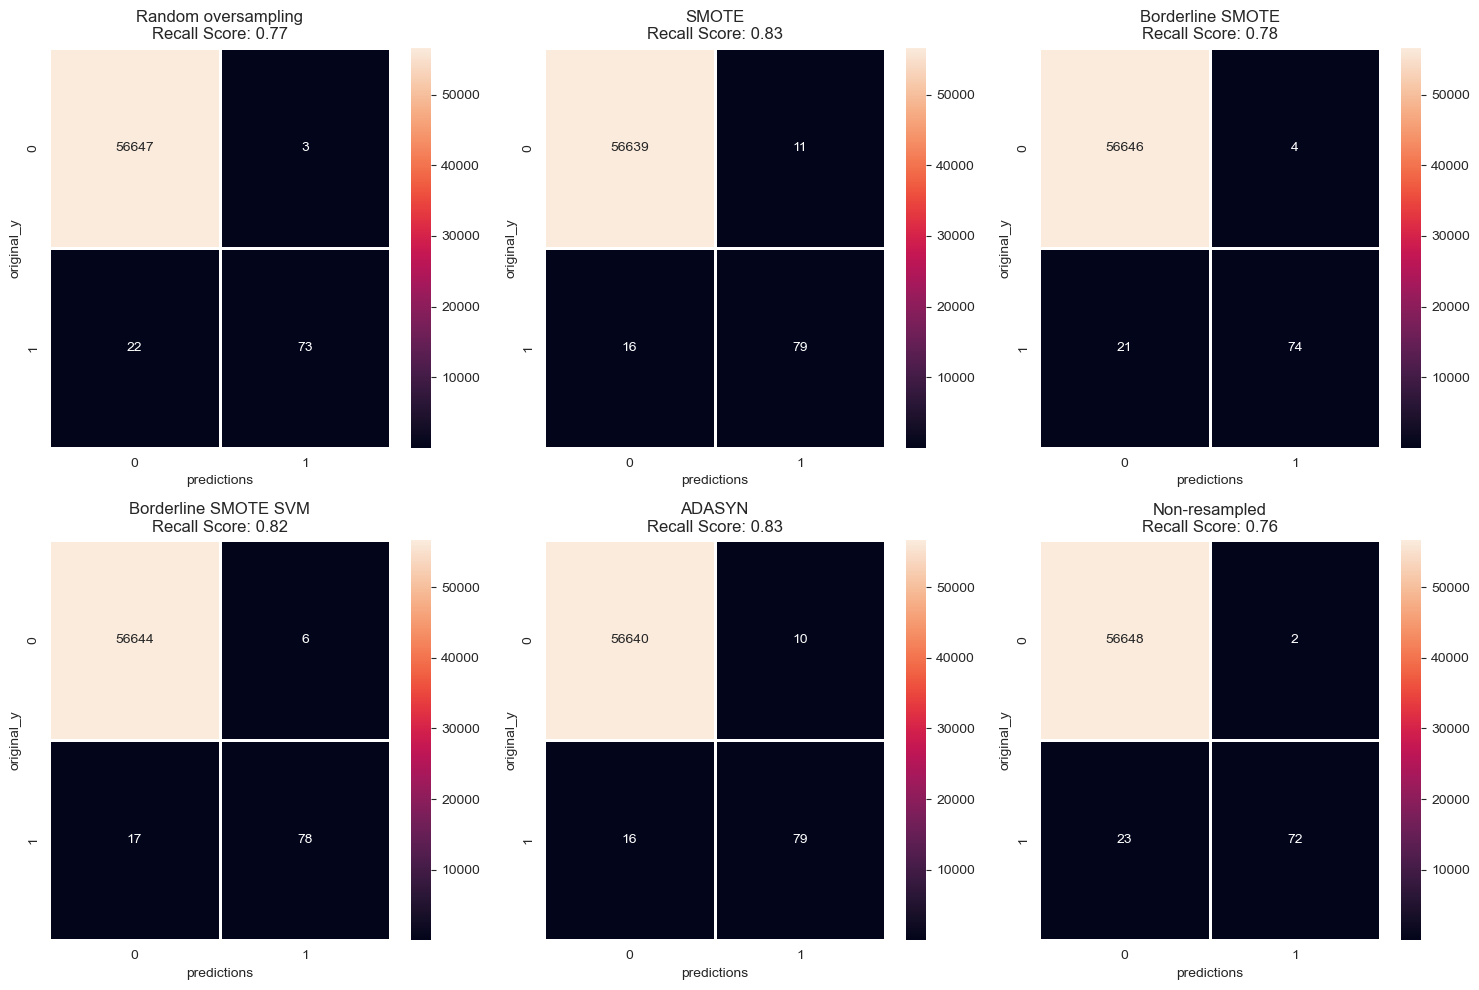

Elapsed time for Random Forest with all oversampling methods: 206.53 seconds


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
classification_model = RandomForestClassifier(n_estimators = 100,min_samples_split = 2,n_jobs = -1)

# start calculating the time
start_time = time.time()

# Fit model with best hyperparameters to training data
classification_model.fit(X_train, y_train)
randomforest_scores = samplingStrategies()
end_time = time.time()
rf_elapsed_time = end_time - start_time
print("Elapsed time for Random Forest with all oversampling methods: {:.2f} seconds".format(end_time - start_time))


### Plot ROC and PR curves for random forest

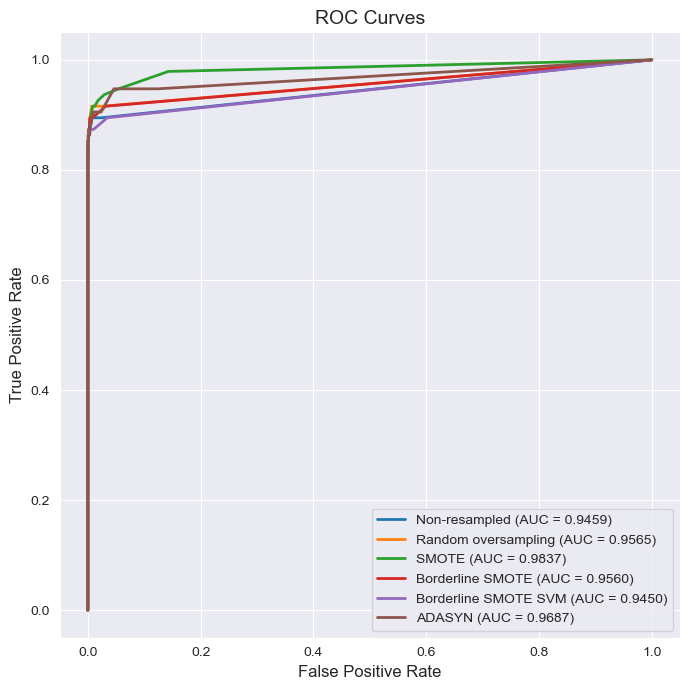

In [84]:
classification_model = RandomForestClassifier(n_estimators = 100,min_samples_split = 2,n_jobs = -1)
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

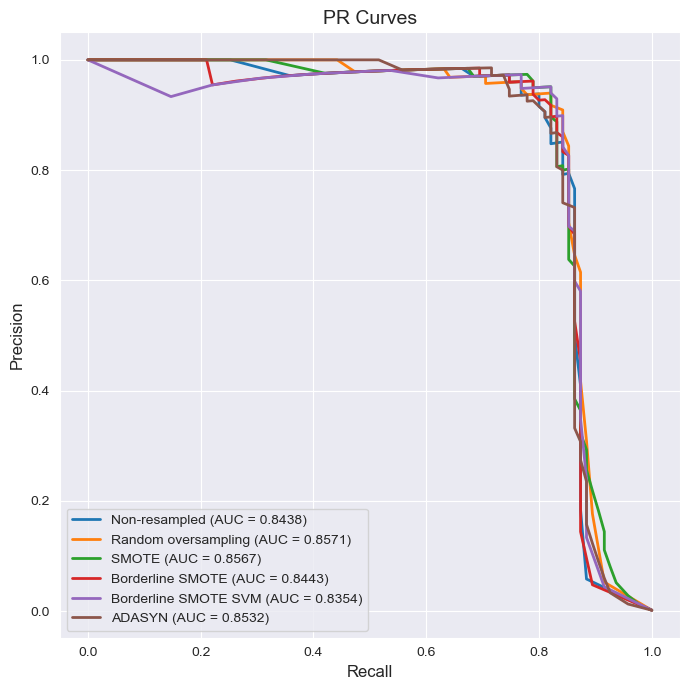

In [85]:
classification_model = RandomForestClassifier(n_estimators = 100,min_samples_split = 2,n_jobs = -1)
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

### SVM

#### Define SVM scoring and sampling strategies 

In [86]:
def svmScoring(model, x_train, y_train, x_test, y_test, title):
    y_score = model.decision_function(x_test)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    all_scores = {"Accuracy score": accuracy_score(y_test, y_pred),
                  "Precision score": (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score": recall_score(y_test, y_pred),
                  "F1 score": f1_score(y_test, y_pred),
                  "ROC AUC score": roc_auc_score(y_test, y_score)}
    print(title)
    print(all_scores)
    return all_scores

def svmSamplingStrategies():
    # Sampling strategies
    samplers = [("Random oversampling", RandomOverSampler(sampling_strategy='minority')),             ("SMOTE", SMOTE(sampling_strategy='minority')),             ("Borderline SMOTE", BorderlineSMOTE(sampling_strategy='minority')),             ("Borderline SMOTE SVM", SVMSMOTE(sampling_strategy='minority')),             ("ADASYN", ADASYN(sampling_strategy='minority'))]

    # Create subplots for each sampling strategy and the non-resampled confusion matrix
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axes = axes.flatten()

    # Plot the non-resampled confusion matrix in the last subplot
    cm_non_resampled = svmScoring(classification_model, X_train, y_train, X_test, y_test, "Non-resampled")
    plot_confusion_matrix(axes[-1], y_test, classification_model.predict(X_test), "Non-resampled")

    # get performance metrics and confusion matrix for each sampling strategy
    cm_resampled_list = []  # create empty list to store each sampler_name and cm_resampled value
    for i, (sampler_name, sampler) in enumerate(samplers):
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        cm_resampled = svmScoring(classification_model, X_resampled, y_resampled, X_test, y_test, sampler_name)
        plot_confusion_matrix(axes[i], y_test, classification_model.predict(X_test), sampler_name)
        cm_resampled_list.append((sampler_name, cm_resampled))  # append a tuple of sampler_name and cm_resampled to the list
        
    cm_resampled_list.append(("Non-resampled", cm_non_resampled))
    plt.tight_layout()
    plt.show()
    return cm_resampled_list


Non-resampled
{'Accuracy score': 0.9991188650982465, 'Precision score': 0.9998587819947043, 'Recall score': 0.5578947368421052, 'F1 score': 0.6794871794871795, 'ROC AUC score': 0.9800540716309751}
Random oversampling
{'Accuracy score': 0.9798043880518107, 'Precision score': 0.9799117387466902, 'Recall score': 0.9157894736842105, 'F1 score': 0.13181818181818183, 'ROC AUC score': 0.9780987596971246}
SMOTE
{'Accuracy score': 0.9783240814168649, 'Precision score': 0.9784289496910856, 'Recall score': 0.9157894736842105, 'F1 score': 0.12393162393162392, 'ROC AUC score': 0.9789224694569609}
Borderline SMOTE
{'Accuracy score': 0.9930566569741828, 'Precision score': 0.9933274492497793, 'Recall score': 0.8315789473684211, 'F1 score': 0.286231884057971, 'ROC AUC score': 0.9372880568588284}
Borderline SMOTE SVM
{'Accuracy score': 0.9931623931623932, 'Precision score': 0.9933627537511033, 'Recall score': 0.8736842105263158, 'F1 score': 0.299638989169675, 'ROC AUC score': 0.9594620708877223}
ADASYN


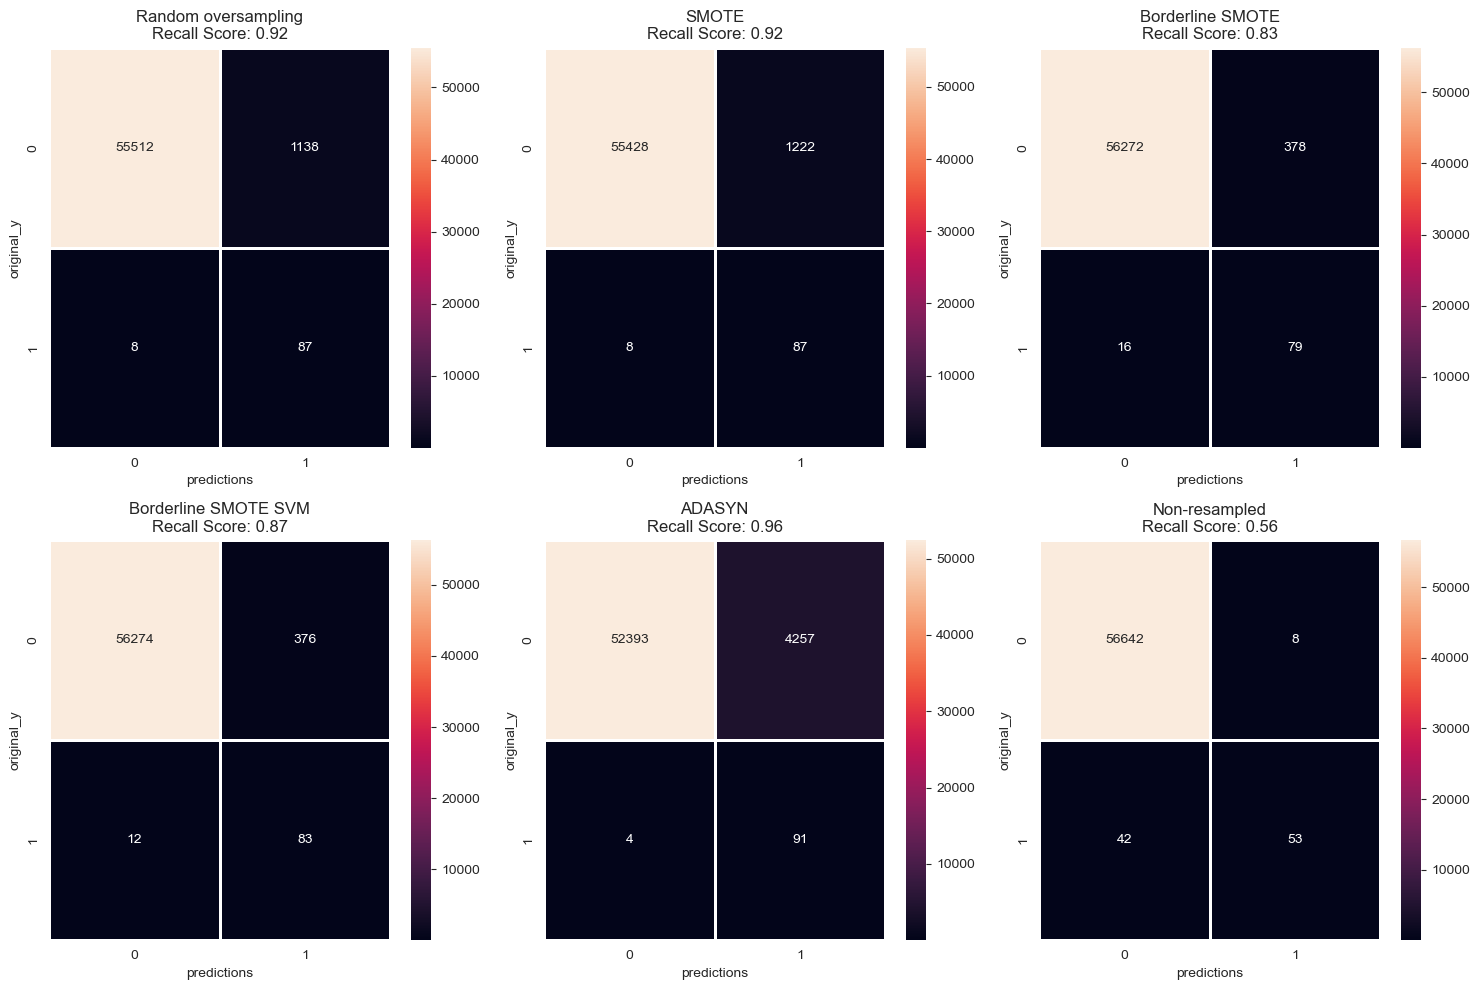

Elapsed time for SVM with all oversampling methods: 27.86 seconds


In [87]:
from sklearn.svm import LinearSVC

# Create the SVM classifier object
classification_model = LinearSVC(C =1.0, dual = False)

# start calculting the time
start_time = time.time()

# Fit the model to the training data
classification_model.fit(X_train, y_train)
svm_scores = svmSamplingStrategies()
end_time = time.time()
svm_elapsed_time = end_time - start_time
print("Elapsed time for SVM with all oversampling methods: {:.2f} seconds".format(end_time - start_time))


#### Define ROC curve and PR curve for SVM

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_ROC_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for ROC curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    
    # Plot ROC curve for non-resampled data
    y_scores = classification_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    axes.plot(fpr, tpr, label="Non-resampled (AUC = {:.4f})".format(roc_auc), lw=2)
    
    # Plot ROC curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_scores = classification_model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        axes.plot(fpr, tpr, label="{} (AUC = {:.4f})".format(sampler_name, roc_auc), lw=2)
    
    axes.set_xlabel("False Positive Rate", fontsize=12)
    axes.set_ylabel("True Positive Rate", fontsize=12)
    axes.set_title("ROC Curves", fontsize=14)
    axes.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()


In [101]:
def plot_PR_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for PR curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    
    # Plot PR curve for non-resampled data
    y_scores = classification_model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = average_precision_score(y_test, y_scores)
    axes.plot(recall, precision, label="Non-resampled (AUC = {:.4f})".format(pr_auc), lw=2)
    
    # Plot PR curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_scores = classification_model.decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = average_precision_score(y_test, y_scores)
        axes.plot(recall, precision, label="{} (AUC = {:.4f})".format(sampler_name, pr_auc), lw=2)
    
    axes.set_xlabel("Recall", fontsize=12)
    axes.set_ylabel("Precision", fontsize=12)
    axes.set_title("PR Curves", fontsize=14)
    axes.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()


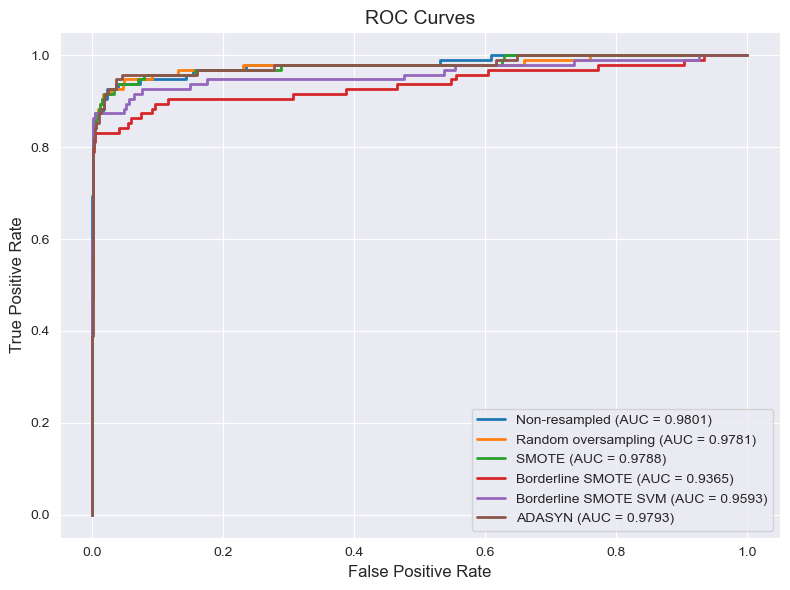

In [90]:
classification_model = LinearSVC(C =1.0, dual = False)
classification_model.fit(X_train, y_train)
plot_ROC_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers)


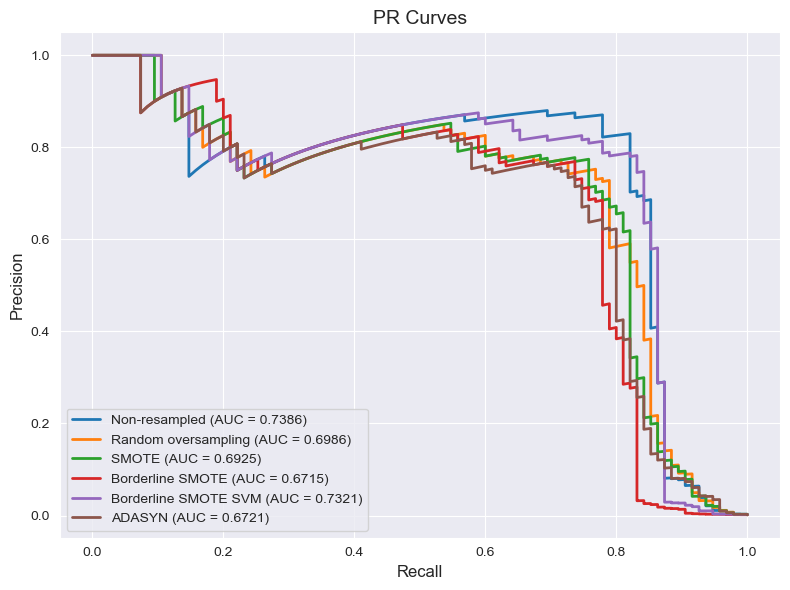

In [102]:
classification_model = LinearSVC(C =1.0, dual = False)
classification_model.fit(X_train, y_train)
plot_PR_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers)

## Collect all scores in a dataframe

In [92]:
# create separate dataframes for each model
logistic_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in logistic_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
knn_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in knn_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
randomforest_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in randomforest_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
svm_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in svm_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])

# merge all the dataframes into a single dataframe
scores_df = pd.merge(logistic_df, knn_df, on='Method')
scores_df = pd.merge(scores_df, randomforest_df, on='Method')
scores_df = pd.merge(scores_df, svm_df, on='Method')


In [93]:
logistic_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.975875,0.975975,0.915789,0.112767,0.977987
1,SMOTE,0.975557,0.975658,0.915789,0.111467,0.979603
2,Borderline SMOTE,0.992457,0.992657,0.873684,0.279461,0.956990
3,Borderline SMOTE SVM,0.992969,0.993169,0.873684,0.293805,0.960241
4,ADASYN,0.920099,0.920053,0.947368,0.038184,0.978644
5,Non-resampled,0.999101,0.999859,0.547368,0.670968,0.970040


In [94]:
knn_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.999313,0.999665,0.789474,0.793651,0.905150
1,SMOTE,0.998749,0.999011,0.842105,0.692641,0.920705
2,Borderline SMOTE,0.999401,0.999718,0.810526,0.819149,0.920915
3,Borderline SMOTE SVM,0.999418,0.999700,0.831579,0.827225,0.920913
4,ADASYN,0.998766,0.999029,0.842105,0.695652,0.920714
5,Non-resampled,0.999524,0.999929,0.757895,0.842105,0.905186


In [95]:
randomforest_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.999559,0.999947,0.768421,0.853801,0.961750
1,SMOTE,0.999524,0.999806,0.831579,0.854054,0.984535
2,Borderline SMOTE,0.999559,0.999929,0.778947,0.855491,0.956064
3,Borderline SMOTE SVM,0.999595,0.999894,0.821053,0.871508,0.955658
4,ADASYN,0.999542,0.999823,0.831579,0.858696,0.979508
5,Non-resampled,0.999559,0.999965,0.757895,0.852071,0.951055


In [96]:
svm_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.979804,0.979912,0.915789,0.131818,0.978099
1,SMOTE,0.978324,0.978429,0.915789,0.123932,0.978922
2,Borderline SMOTE,0.993057,0.993327,0.831579,0.286232,0.937288
3,Borderline SMOTE SVM,0.993162,0.993363,0.873684,0.299639,0.959462
4,ADASYN,0.924910,0.924854,0.957895,0.040963,0.979411
5,Non-resampled,0.999119,0.999859,0.557895,0.679487,0.980054


In [97]:
scores_df

,Method,Accuracy score_x,Precision score_x,Recall score_x,F1 score_x,ROC AUC score_x,Accuracy score_y,Precision score_y,Recall score_y,F1 score_y,ROC AUC score_y,Accuracy score_x,Precision score_x,Recall score_x,F1 score_x,ROC AUC score_x,Accuracy score_y,Precision score_y,Recall score_y,F1 score_y,ROC AUC score_y
0,Random oversampling,0.975875,0.975975,0.915789,0.112767,0.977987,0.999313,0.999665,0.789474,0.793651,0.905150,0.999559,0.999947,0.768421,0.853801,0.961750,0.979804,0.979912,0.915789,0.131818,0.978099
1,SMOTE,0.975557,0.975658,0.915789,0.111467,0.979603,0.998749,0.999011,0.842105,0.692641,0.920705,0.999524,0.999806,0.831579,0.854054,0.984535,0.978324,0.978429,0.915789,0.123932,0.978922
2,Borderline SMOTE,0.992457,0.992657,0.873684,0.279461,0.956990,0.999401,0.999718,0.810526,0.819149,0.920915,0.999559,0.999929,0.778947,0.855491,0.956064,0.993057,0.993327,0.831579,0.286232,0.937288
3,Borderline SMOTE SVM,0.992969,0.993169,0.873684,0.293805,0.960241,0.999418,0.999700,0.831579,0.827225,0.920913,0.999595,0.999894,0.821053,0.871508,0.955658,0.993162,0.993363,0.873684,0.299639,0.959462
4,ADASYN,0.920099,0.920053,0.947368,0.038184,0.978644,0.998766,0.999029,0.842105,0.695652,0.920714,0.999542,0.999823,0.831579,0.858696,0.979508,0.924910,0.924854,0.957895,0.040963,0.979411
5,Non-resampled,0.999101,0.999859,0.547368,0.670968,0.970040,0.999524,0.999929,0.757895,0.842105,0.905186,0.999559,0.999965,0.757895,0.852071,0.951055,0.999119,0.999859,0.557895,0.679487,0.980054


In [99]:
# export the dataframe to a csv file
scores_df.to_csv('credit_card_fraud_detection_combined_scores1.csv', index=False)

In [103]:
import pandas as pd

# Create a dictionary with the elapsed time values
data = {
    'log_reg_elapsed_time': [log_reg_elapsed_time],
    'knn_elapsed_time': [knn_elapsed_time],
    'linear_svc_elapsed_time': [svm_elapsed_time],
    'random_forest_elapsed_time': [rf_elapsed_time]
}

# Create a dataframe from the dictionary
computational_times = pd.DataFrame(data)

In [104]:
computational_times

,log_reg_elapsed_time,knn_elapsed_time,linear_svc_elapsed_time,random_forest_elapsed_time
0,24.062695,232.786719,27.863547,206.52731


In [105]:
computational_times.to_csv('ccfd_computational_times.csv', index=False)